In [1]:
import networkx as nx
from operator import add, sub

import numpy as np
import matplotlib.pyplot as plt
from main_definitions import *
import random
import copy
import python_springrank.tools as tl
from statistics import mean
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from load_datasets import *

In [2]:
dataframe_perf_gains = pd.DataFrame(columns=["SpringRank performance", "PostRank performance"])
dataframe_perf_gains

,SpringRank performance,PostRank performance


In [3]:
results_by_dataset = {}

reverse = False
min_iter = 20
print_rate = 100
cut_off_change = 1
max_iter = 100
print_stuff = False

num_of_runs_on_dataset = 25

In [4]:
datasets = ["twitter"]

In [5]:
for dataset in datasets:

    DG = load_dataset(dataset)

    mapping = dict(zip(DG, range(0, DG.number_of_nodes())))
    relabelled_DG = nx.relabel_nodes(DG, mapping)


    print("Running for dataset ", dataset)

    for i in range(num_of_runs_on_dataset):
        print("     iteration ", i)
        reduced_graph, removed_edges = reduce_graph(relabelled_DG, perc_edge_del=0.2)

        postrank = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                           page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                           backflow = True, backflow_const = 0.2,
                           min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                           cut_off_change = cut_off_change, print_stuff=False)

        springrank = get_spring_ranks(reduced_graph, with_rounding = False)


        perf_springrank = perc_correct(removed_edges, springrank)
        perf_postrank = perc_correct(removed_edges, postrank)

        postrank_row = {"SpringRank performance": perf_springrank, "PostRank performance": perf_postrank}


        dataframe_perf_gains = dataframe_perf_gains.append(postrank_row, ignore_index=True)


Running for dataset  twitter
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iteration  6
     iteration  7


KeyboardInterrupt: 

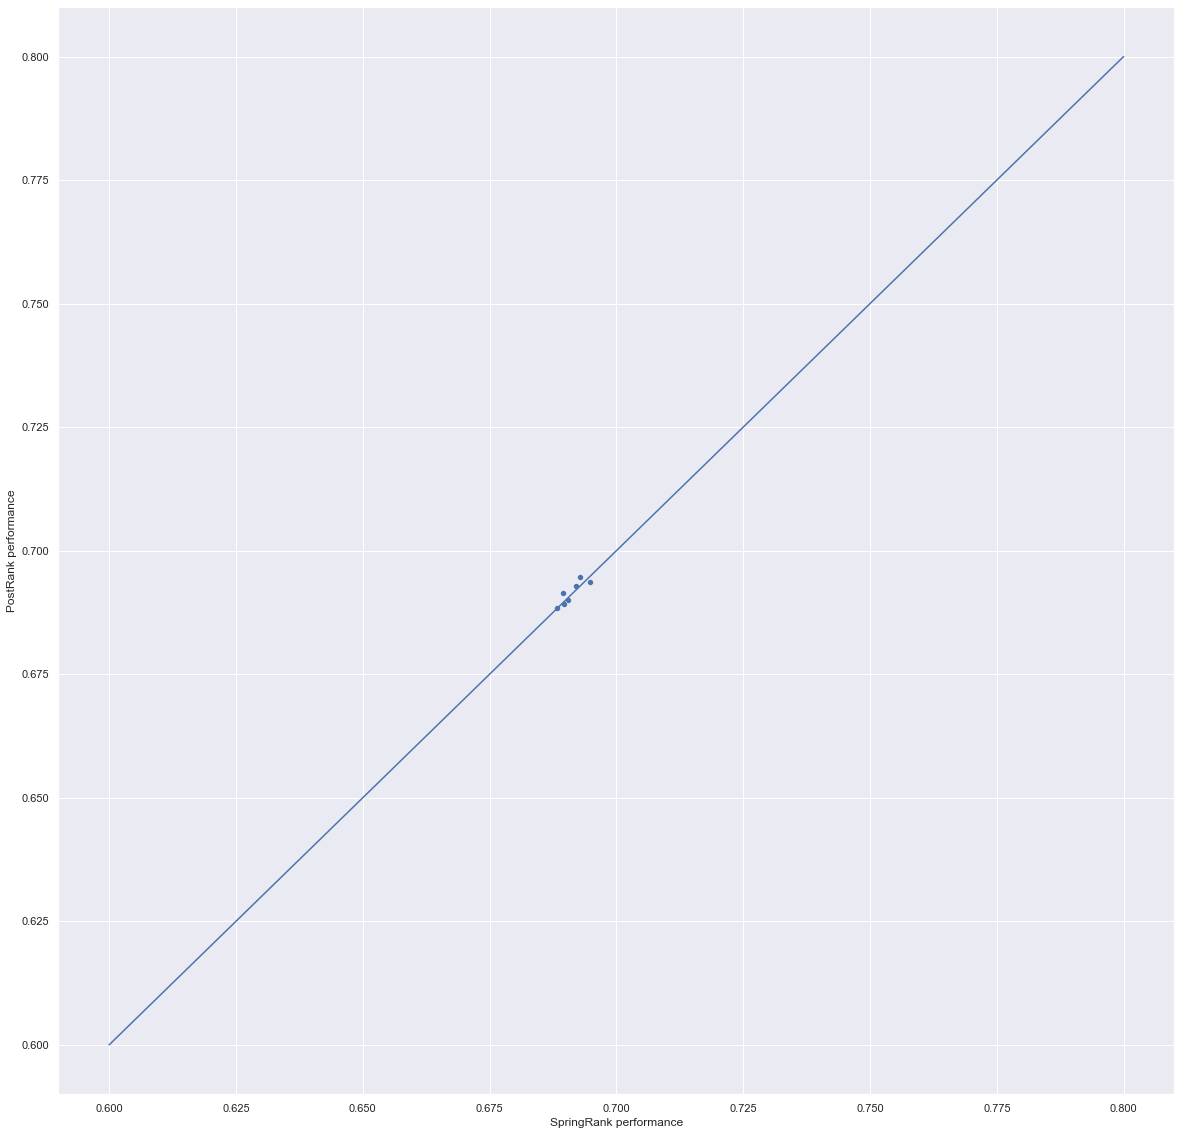

In [7]:
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(data=dataframe_perf_gains, x="SpringRank performance", y="PostRank performance")
X_plot = np.linspace(0.6, 0.8, 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b')
plt.show()


In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over SpringRank", hue="Method", data=dataframe_perf_gains, palette="Pastel1")
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(35,13)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over PageRank", hue="Method", data=dataframe_perf_gains, palette=sns.color_palette("Pastel1")
, width=0.8)

sns_plot.axes.set_title("SpringRank vs. PostRank",fontsize=25)
sns_plot.set_xlabel("Network Datasets",fontsize=20)
sns_plot.set_ylabel("Change in performace from PageRank",fontsize=20)
y_ticks = sns_plot.get_yticks()
sns_plot.set_yticklabels([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5], size = 15)
sns_plot.set_xticklabels(datasets, size = 18)
sns_plot.xaxis.labelpad = 15
sns_plot.axhline(y=0, color='green')
plt.setp(sns_plot.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(sns_plot.get_legend().get_title(), fontsize='22') # for legend title
for i in range(len(np.unique(dataframe_perf_gains['Dataset'])) - 1):
    sns_plot.axvline(i + 0.5, color='grey', lw=1)


sns_plot.figure.savefig("SpringRank_vs_PostRank.png")
plt.show()

In [ ]:
sns_plot.get_yticks()
